In [1]:
import anndata
import pandas as pd
import numpy as np
import xarray as xr
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

/home/hanliu/miniconda3/envs/clustering/lib/python3.7/site-packages/xarray/core/merge.py:18: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)
/home/hanliu/miniconda3/envs/clustering/lib/python3.7/site-packages/xarray/core/dataarray.py:1829: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  'DataArray', pd.Series, pd.DataFrame, pd.Panel]:


## Cell Tidy Data

In [2]:
cell_tidy_data = pd.read_msgpack(
    '/home/hanliu/project/mouse_rostral_brain/study/ClusteringSummary/Summary/TotalClusteringResults.msg'
)
# Neuron
cell_tidy_data = cell_tidy_data[
    cell_tidy_data['SubType'].apply(lambda i: 'Outlier' not in i)
    & (cell_tidy_data['CellClass'] != 'NonN')]
subtypes = cell_tidy_data['SubType'].unique()

/home/hanliu/miniconda3/envs/clustering/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The read_msgpack is deprecated and will be removed in a future version.
It is recommended to use pyarrow for on-the-wire transmission of pandas objects.
  exec(code_obj, self.user_global_ns, self.user_ns)


## get input

In [3]:
adata = anndata.read_h5ad(
    '/home/hanliu/project/mouse_rostral_brain/study/Level1-CellClass/ALL_manual/Coords/adata.with_pc_and_coords.h5ad'
)

pc_df = pd.DataFrame(adata.obsm['X_pca'], 
                     index=adata.obs_names, 
                     columns=[f'PC{i}' for i in range(adata.obsm['X_pca'].shape[1])])

In [4]:
cluster_center = pc_df.groupby(cell_tidy_data['SubType']).median()

cluster_center.to_csv('ClusterCenter.PC.csv')
cluster_center.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38
SubType,,,,,,,,,,,,,,,,,,,,,
CA1 Ak5,-5.999864,-4.209180,12.226802,7.743613,4.234441,2.231156,10.683336,5.589606,0.995920,5.915255,...,1.833501,1.441299,0.399985,3.764045,-1.909920,-0.681561,0.563826,-1.047585,-0.109559,0.481940
CA1 Chrm3,-8.711650,-4.429135,18.817636,3.991724,7.294276,-5.178679,13.519091,2.899949,8.371542,8.036167,...,1.698339,7.862014,-1.897244,9.640708,1.408368,0.211026,-0.672086,-3.271004,2.734035,-3.519800
CA1 Kif26a,-12.948008,-0.966431,7.147309,3.565819,2.158557,-5.203692,12.427802,-4.734591,1.234510,10.973618,...,3.581908,2.493712,1.453523,6.558667,-2.138449,0.302483,2.089242,-1.716012,3.068071,-0.573448
CA1 Lingo2,-14.159185,-1.399465,17.886078,0.284259,0.568957,-0.794349,6.349891,5.151184,-2.930744,2.900490,...,-1.216183,2.656663,0.740784,5.110901,-2.255825,0.145182,0.579939,-0.769174,0.317682,1.023199
CA1 Ptprg,-10.600737,-3.818719,19.223249,5.420257,6.603068,-2.790702,13.092817,5.542527,2.148448,8.711375,...,1.050997,4.046826,-0.520645,6.887694,-2.449367,0.495255,0.111660,-2.242560,0.575257,-0.610421


## Linkage

In [5]:
# link = linkage(np.matrix(cluster_center.values), 
# method='average', metric='correlation', optimal_ordering=True)
link = linkage(np.matrix(cluster_center.values), 
               method='average', metric='correlation', optimal_ordering=True)

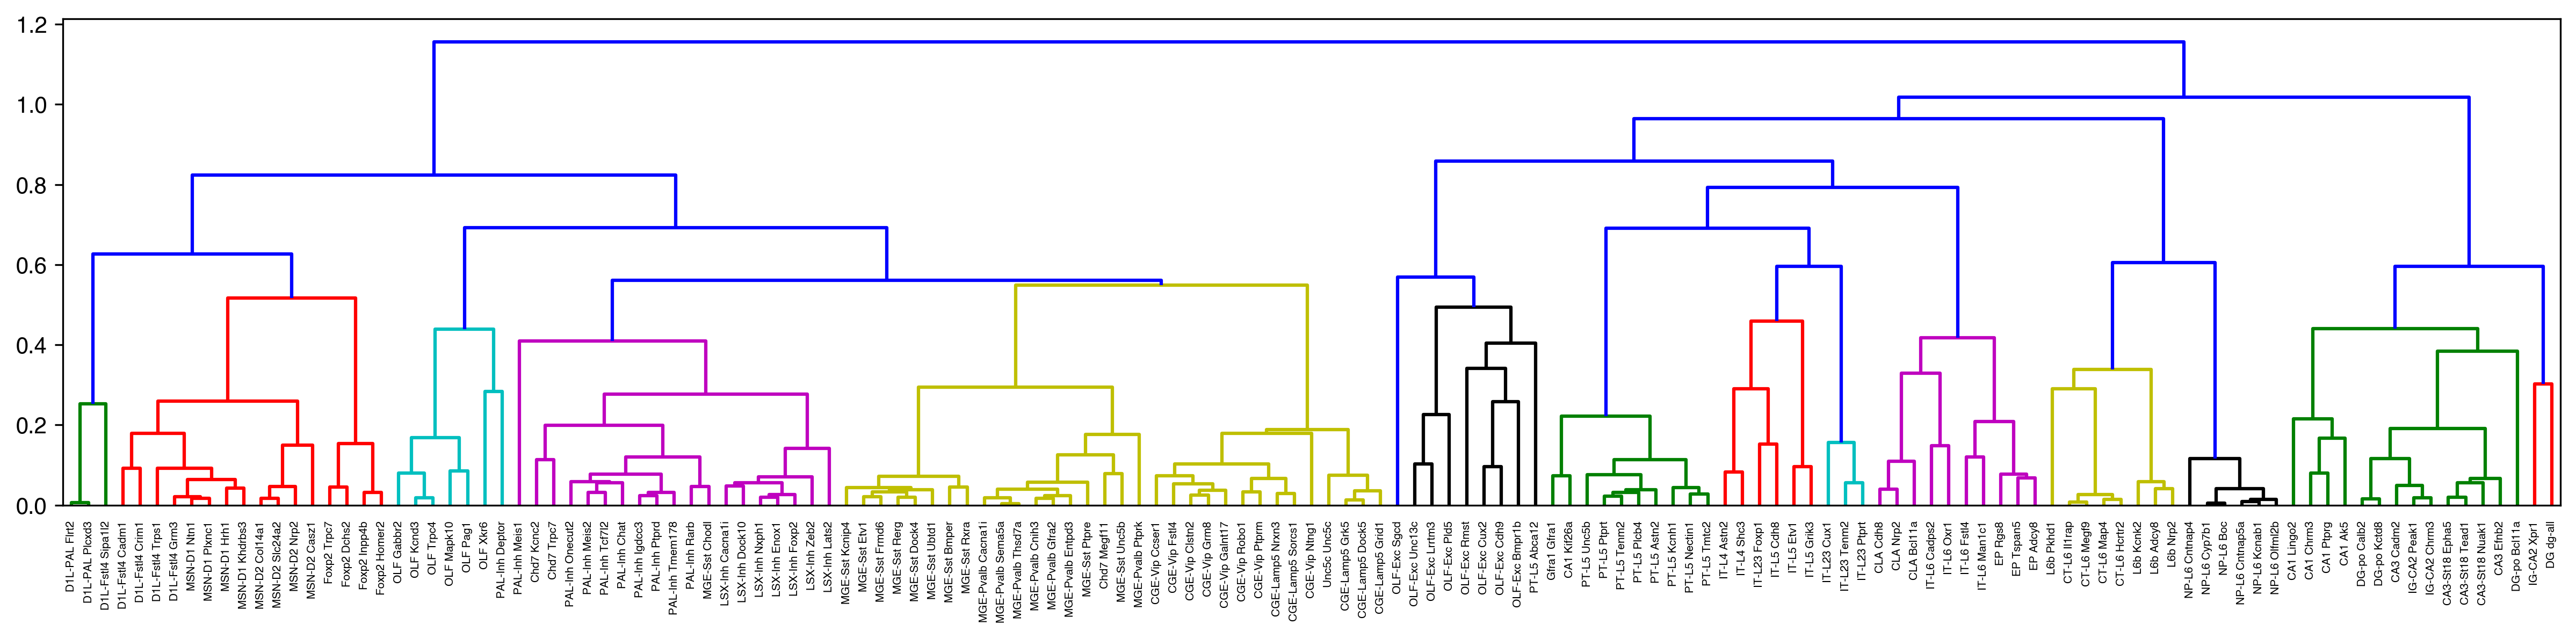

In [8]:
fig, ax = plt.subplots(figsize=(20, 4), dpi=300)
dendro = dendrogram(link, labels=cluster_center.index, ax=ax, 
                    color_threshold=0.55)

In [7]:
import json
with open('NeuronSubType.L1PC.dendro.json', 'w') as f:
    json.dump(dendro, f)

In [8]:
pd.DataFrame(link).to_csv('NeuronSubType.L1PC.linkage.csv', index=None, header=None)

In [9]:
with open('NeuronSubType.L1PC.cluster_order.txt', 'w') as f:
    for cluster in dendro['ivl']:
        f.write(cluster + '\n')

In [ ]:
dendro